<a href="https://colab.research.google.com/github/DarioMameli/DL_Assignments/blob/main/DL_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Assignment 3
## Group 4
**AUTHORS**:
*   Dario Mameli [dario.mameli@ugent.be]
*   Àngel Masip LLopis [angel.masipllopis@ugent.be]
*   Michele Russo [michele.russo@ugent.be]



This notebook is to be intended as both report and code.

Running on google colab is suggested to make sure all required libraries and packages are present.

#GitHub

Let's clone the repo with the dataset

In [ ]:
!git clone https://github.com/dkdk22/DL_Ass3
import sys
# Add the repository to the path
sys.path.insert(1, '/content/DL_Ass3/')

Cloning into 'DL_Ass3'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 22.54 MiB | 18.43 MiB/s, done.


# Setup

Firstly let's setup the workspace

## Pip Installs

In [ ]:
# Install the latest version of TensorFlow, which includes Keras (tf.keras)
#!pip install tensorflow --upgrade

!pip install keras --upgrade --quiet
!pip install keras-tuner --upgrade
!pip install PrettyTable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 7.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


## Packages

Let's import all the necessary functions and packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import regularizers
import matplotlib.gridspec as gridspec
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import nltk
from nltk.corpus import stopwords
import keras_tuner as kt
from keras import backend as backend
from keras.layers import (
    Input,
    Activation,
    BatchNormalization,
    Conv2D,
    Conv2DTranspose,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    MaxPooling2D,
    UpSampling2D
)
from keras.optimizers import SGD, Adam

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import json
import zipfile
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import gdown
import zipfile
import os
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor
from nltk.stem import PorterStemmer
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.applications as app
from keras.layers import LSTM, Dense, Embedding, Input, GRU, Bidirectional

import gc

from prettytable import PrettyTable

import zipfile
from skimage.segmentation import mark_boundaries
from sklearn.preprocessing import minmax_scale

import warnings
warnings.filterwarnings('ignore')

#Global variables

In [ ]:
SEED =42
TRAIN_BASELINE = True

# Load data

Load the dataset

In [ ]:
zip_file_path = 'DL_Ass3/review_553850.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref: #Extract the file
    zip_ref.extractall()

with open('review_553850.json', 'r') as json_file: # Open the json file
    data = json.load(json_file)

X = []
y = []

for id, review in data["reviews"].items():
    review_text = review["review"]
    funny_votes = review["votes_funny"]
    X.append(review_text)
    y.append(funny_votes)

In [ ]:
print(X[1000])
print(y[1000])

print(len(X))
print(len(y))

For tea!
0
189600
189600


###On closer inspection of the data we see that the target is very unbalanced.

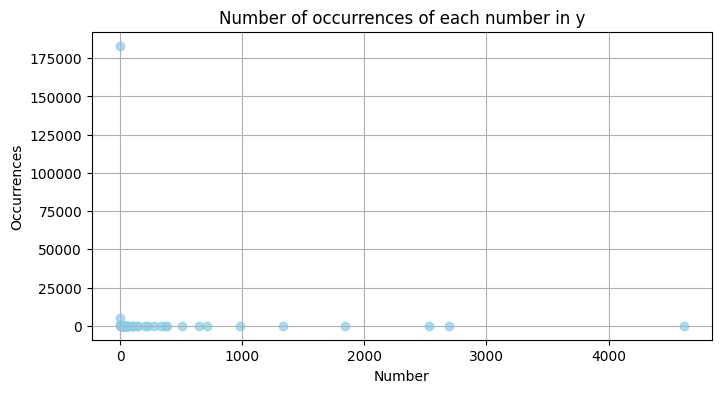

In [ ]:
unique_numbers, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(8, 4))
plt.scatter(unique_numbers, counts, color='skyblue', alpha=0.7)
plt.xlabel('Number of funny_votes')
plt.ylabel('Occurrences')
plt.title('Occurrences per number of funny_votes')
plt.grid(True)
plt.show()

We do a log-plot as it is more representative

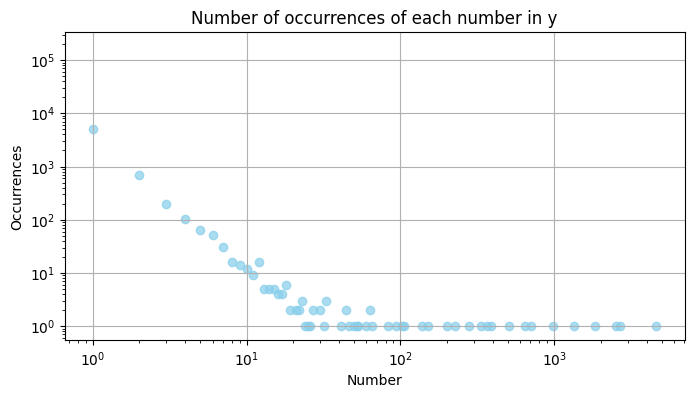

In [ ]:
unique_numbers, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(8, 4))
plt.scatter(unique_numbers, counts, color='skyblue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of funny_votes')
plt.ylabel('Occurrences')
plt.title('Occurrences per number of funny_votes')
plt.grid(True)
plt.show()

##Data preprocessing

We are going to convert the text into arrays of integers and pad our sequences. As the sequences are very very long we are going to eliminate stopwords to reduce the dimensionality of the data, also we are going to use steeming and tokenize and pad the sentences.

We have tried to use BERT or RoBERTa but due to the limitations of collab it is not possible to use these alternatives. We have even used 'destilbert-base-uncased' or smaller variants like 'destilbert-base-uncased-destilled-squad' but due to the large size of our dataset it is impossible.

In [ ]:
# Preprocessing + tokenizer + padding? fast text
# Word2vec?
# RoBERTa?

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

X_prepro = []
for text in X:
    words = text.split()
    # Remove stopwords and convert to lowercase
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    #stemmed_tokens = [stemmer.stem(word) for word in filtered_words]
    # Join the filtered words back into a string
    #preprocessed_text = ' '.join(stemmed_tokens)
    X_prepro.append(stemmed_tokens)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
num_words=10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_prepro)
X_sequences = tokenizer.texts_to_sequences(X_prepro)
max_sequence_length = 800
padded_sequences = pad_sequences(X_sequences, maxlen=max_sequence_length)

In [ ]:
print(len(X_prepro))
print(X_prepro[0])
print(X_prepro[1000])
print(X_prepro[18961])
print(padded_sequences[0])
print(padded_sequences[1000])

189600
['↑→↓↓↓']
['tea!']
['game', 'rocketed', 'top', 'playlist', 'exceptional', 'core', 'gameplay', 'great', 'handling', 'creators', 'course', 'release.', 'already', 'consider', 'favorite', 'tps,', 'see', 'popularity', 'resonates', 'lot', 'gamers.', 'hallmarks', 'great', 'video', 'game,', 'well-implemented', 'systems', 'general', 'desire', 'let', 'fun', 'play', 'power', 'fantasy.', 'combat', 'snappy', 'weighed', 'realism.', 'visual', 'language', 'easy', 'follow,', 'lot', 'personality.', 'highly', 'recommend', 'fans', 'tpss,', 'horde', 'fighters,', 'action-based', 'cooperative', 'play.', 'expect', 'die', 'lot,', 'take', 'seriously.', 'game', 'ridiculously', 'hard,', "that's", 'makes', 'satisfying', 'win.', 'laugh', 'failure', 'play', 'again.', 'lot', 'stink', 'put', 'game', 'bugs,', 'server', 'loads,', 'troubleshooting.', 'apparent', 'demand', 'game', 'overshot', "developer's", 'expectations,', "that's", 'something', 'players', 'patient', 'about.', 'arrowhead', 'top', 'issues', 'since'

In [ ]:
X = np.array(padded_sequences)
y = np.array(y)
print(X[1000])
print(padded_sequences[1000])
print(X_sequences[1000])
print(X.shape)
print(y.shape)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
longest_text = max(X, key=len)

print("length:", len(longest_text))
print("Larger text:")
print(longest_text)


length: 800
Larger text:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

# Baseline model

This model represents the baseline, we use this model to compare the performance of ML models with RNN models, and will be used as a reference to see how other models perform.

In [ ]:
model = GradientBoostingRegressor()

# Our model

In [ ]:
class HyperModelBuilder(kt.HyperModel):
    def __init__(self, max_sequence_length, loss_function, max_features):
        self.max_sequence_length = max_sequence_length
        self.loss_function = loss_function
        self.max_features = max_features

    def build_lstm_model(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=self.max_features, output_dim=hp.Int('embedding_dim', min_value=128, max_value=256, step=32)))  #fix embedding size?
        model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), #https://keras.io/api/layers/recurrent_layers/lstm/
                       dropout=hp.Float('dropout', min_value=0.0, max_value=0.3, step=0.1),
                       recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.3, step=0.1), #reduce two dropouts
                       input_shape=(self.max_sequence_length, 1)))
        model.add(Dense(1, activation="linear"))

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                      loss=self.loss_function,
                      metrics=["mean_absolute_error"])
        return model

    def build_bidirectional_lstm_model(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=self.max_features, output_dim=hp.Int('embedding_dim', min_value=128, max_value=256, step=32)))
        model.add(Bidirectional(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                                     dropout=hp.Float('dropout', min_value=0.0, max_value=0.3, step=0.1),
                                     recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.3, step=0.1),
                                     input_shape=(self.max_sequence_length, 1))))
        model.add(Dense(1, activation="linear"))

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                      loss=self.loss_function,
                      metrics=["mean_absolute_error"])
        return model


    def build_gru_model(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=self.max_features, output_dim=hp.Int('embedding_dim', min_value=128, max_value=256, step=32)))
        model.add(GRU(units=hp.Int('units', min_value=32, max_value=256, step=32),   #https://keras.io/api/layers/recurrent_layers/gru/
                      dropout=hp.Float('dropout', min_value=0.0, max_value=0.3, step=0.1),
                      recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.3, step=0.1),
                      input_shape=(self.max_sequence_length, 1)))
        model.add(Dense(1, activation="linear"))

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                      loss=self.loss_function,
                      metrics=["mean_absolute_error"])
        return model

    def build_model(self,hp):
        model_name = hp.Choice('model_name', values=['LSTM', 'BidirectionalLSTM', 'GRU'])
        if model_name == 'LSTM':
            return self.build_lstm_model(hp)
        elif model_name == 'BidirectionalLSTM':
            return self.build_bidirectional_lstm_model(hp)
        elif model_name == 'GRU':
            return self.build_gru_model(hp)

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(X_train, y_train, validation_data=(X_val, y_val), *args, **kwargs)


In [ ]:
# Define hyperparameters for the tuner
hypermodel_builder = HyperModelBuilder(max_sequence_length=max_sequence_length,
                                       loss_function="mean_squared_error", max_features=10000)

# Initialize tuner
tuner = kt.BayesianOptimization(hypermodel_builder.build_model,
                        objective='val_loss',
                        max_trials=10,
                        executions_per_trial=1, # The documentation says that makes things faster
                        overwrite=True,
                        directory='tuner_results',
                        project_name='regression_tuning')

# Summarize the search space
tuner.search_space_summary()

Search space summary
Default search space size: 6
model_name (Choice)
{'default': 'LSTM', 'conditions': [], 'values': ['LSTM', 'BidirectionalLSTM', 'GRU'], 'ordered': False}
embedding_dim (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.1, 'sampling': 'linear'}
recurrent_dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.2, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05], 'ordered': True}


# Training


##Training the Baseline

Testing data split

Split training data into training and validation data.

In [ ]:
#We do not use validation data because is not used in this type of algorithms
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=SEED)

In [ ]:
if TRAIN_BASELINE:
  model.fit(X_train, y_train)
  joblib.dump(model, '/content/DL_Ass3/baseline_model.pkl')
else:
  loaded_model = joblib.load('/content/DL_Ass3/baseline_model.pkl')



In [ ]:
baseline_score = model.score(X_test, y_test)
print("Coefficient of determination:", baseline_score)

y_pred = model.predict(X_test) # Predict on validation set

baseline_mse = mean_squared_error(y_test, y_pred)
baseline_nmse = mean_squared_error(y_test, y_pred) / np.var(y_test)
baseline_mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", baseline_mse)
print("Normalized Mean Squared Error (NMSE):", baseline_nmse)
print("Mean Absolute Error (MAE):", baseline_mae)

Coefficient of determination: -0.011385436999379772
Mean Squared Error (MSE): 688.7845851177743
Normalized Mean Squared Error (NMSE): 1.0113854369993798
Mean Absolute Error (MAE): 0.38126245415585774


##Training our model

Validation data split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True,  random_state=SEED)

In [ ]:

# Early stop to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(
  monitor="val_loss",
  min_delta=0,
  patience=4,
  verbose=0,
  mode="auto",
  baseline=None,
  restore_best_weights=True,
  start_from_epoch=0,
)


# Perform hyperparameter search
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=512, callbacks=[stop_early])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps)
best_model = tuner.hypermodel.build(best_hps)






history = best_model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_val, y_val), callbacks=[stop_early])

# Plot the training summary
#plot_history(history)


Trial 10 Complete [00h 06m 25s]
val_loss: 2.598926305770874

Best val_loss So Far: 2.5965094566345215
Total elapsed time: 01h 05m 06s
Epoch 1/50
 405/3792 ━━━━━━━━━━━━━━━━━━━━ 1:52:54 2s/step - loss: 88.2933 - mean_absolute_error: 0.2503

In [ ]:
y_pred = best_model.predict(X_test) # Predict on validation set

best_model_mse = mean_squared_error(y_test, y_pred)
best_model_nmse = mean_squared_error(y_test, y_pred) / np.var(y_test)
best_model_mae = mean_absolute_error(y_test, y_pred)


table = PrettyTable()
table.field_names = ["Model","MSE","NMSE","MAE","Improvement over baseline (MAE)"]

table.add_row(["Our Model",best_model_mse,best_model_nmse,best_model_mae,str(100*(best_model_mae-baselinemodel_mae)/baselinemodel_mae)+"%"])
table.add_row(["Base Line Model",baselinemodel_mse,baselinemodel_nmse,baselinemodel_mae,(str(0)+"%")])
print(table)